In [2]:
import os
from matplotlib import pyplot

In [3]:
train_dataset_path = '/home/pika/Downloads/GSR-Downloads/Handwritten/datasetHW'

dataset_files = os.listdir(train_dataset_path)

annotations = list(filter(lambda file: 'txt' in file, dataset_files))

annotations = [train_dataset_path+'/'+filename for filename in annotations]

#List of Annotation Files
print(annotations[0:4])
print(len(annotations))


['/home/pika/Downloads/GSR-Downloads/Handwritten/datasetHW/Paresh-17.txt', '/home/pika/Downloads/GSR-Downloads/Handwritten/datasetHW/Kapil_1.txt', '/home/pika/Downloads/GSR-Downloads/Handwritten/datasetHW/Paresh-2.txt', '/home/pika/Downloads/GSR-Downloads/Handwritten/datasetHW/Kapil_8.txt']
111


In [4]:
space_names_path = '/home/pika/Downloads/GSR-Downloads/Handwritten/handwritten_english.names'

space_names_file = open(space_names_path, 'r')
chars = space_names_file.readlines()

char_index_map = dict()

i=0
for char in chars:
    char_index_map[i] = char.replace('\n', '')
    i+=1

print(char_index_map)

{0: 'A', 1: 'a', 2: 'B', 3: 'b', 4: 'C', 5: 'c', 6: 'D', 7: 'd', 8: 'E', 9: 'e', 10: 'F', 11: 'f', 12: 'G', 13: 'g', 14: 'H', 15: 'h', 16: 'I', 17: 'i', 18: 'J', 19: 'j', 20: 'K', 21: 'k', 22: 'L', 23: 'l', 24: 'M', 25: 'm', 26: 'N', 27: 'n', 28: 'O', 29: 'o', 30: 'P', 31: 'p', 32: 'Q', 33: 'q', 34: 'R', 35: 'r', 36: 'S', 37: 's', 38: 'T', 39: 't', 40: 'U', 41: 'u', 42: 'V', 43: 'v', 44: 'W', 45: 'w', 46: 'X', 47: 'x', 48: 'Y', 49: 'y', 50: 'Z', 51: 'z', 52: '0', 53: '1', 54: '2', 55: '3', 56: '4', 57: '5', 58: '6', 59: '7', 60: '8', 61: '9', 62: '!', 63: '"', 64: ',', 65: '#', 66: '$', 67: '%', 68: "'", 69: '*', 70: '+', 71: '-', 72: '.', 73: '/', 74: ':', 75: ';', 76: '=', 77: '?', 78: '@'}


In [5]:
from collections import Counter

counts = Counter()

for annotation_file in annotations:

    a_file = open(annotation_file)
    a_file_lines = a_file.readlines()
    index_list = []

    for line in a_file_lines:
        index_list.append(line.split(' ')[0])

    counts.update(index_list)

count_dict = dict(counts)

char_labels = [char_index_map[int(index)] for index in count_dict.keys()]
char_count = dict(zip(char_labels, count_dict.values()))

print(char_count)

{'a': 1517, 'o': 1512, 'I': 118, 'H': 28, '-': 48, 'e': 2414, 't': 1785, 'i': 1475, 's': 1350, 'd': 710, '.': 253, 'w': 325, 'g': 404, 'n': 1401, ',': 162, 'h': 772, 'l': 755, 'p': 371, 'c': 736, 'y': 355, 'v': 236, 'O': 24, 'r': 1241, 'u': 561, 'k': 131, 'f': 407, 'm': 476, 'P': 46, 'b': 268, ':': 29, 'x': 35, 'D': 36, 'S': 63, 'T': 76, 'R': 22, 'C': 45, '4': 5, 'A': 84, 'z': 23, 'q': 26, 'L': 35, 'G': 19, 'M': 43, 'E': 70, 'N': 34, '2': 19, 'K': 12, "'": 32, '+': 2, '"': 10, 'V': 13, 'j': 16, '1': 21, '3': 9, 'W': 26, 'B': 23, 'F': 12, '?': 7, '/': 8, '0': 12, '9': 1, '8': 7, '7': 2, '!': 2, 'Y': 11, 'U': 3, 'X': 1, ';': 3, 'J': 1}


69 69


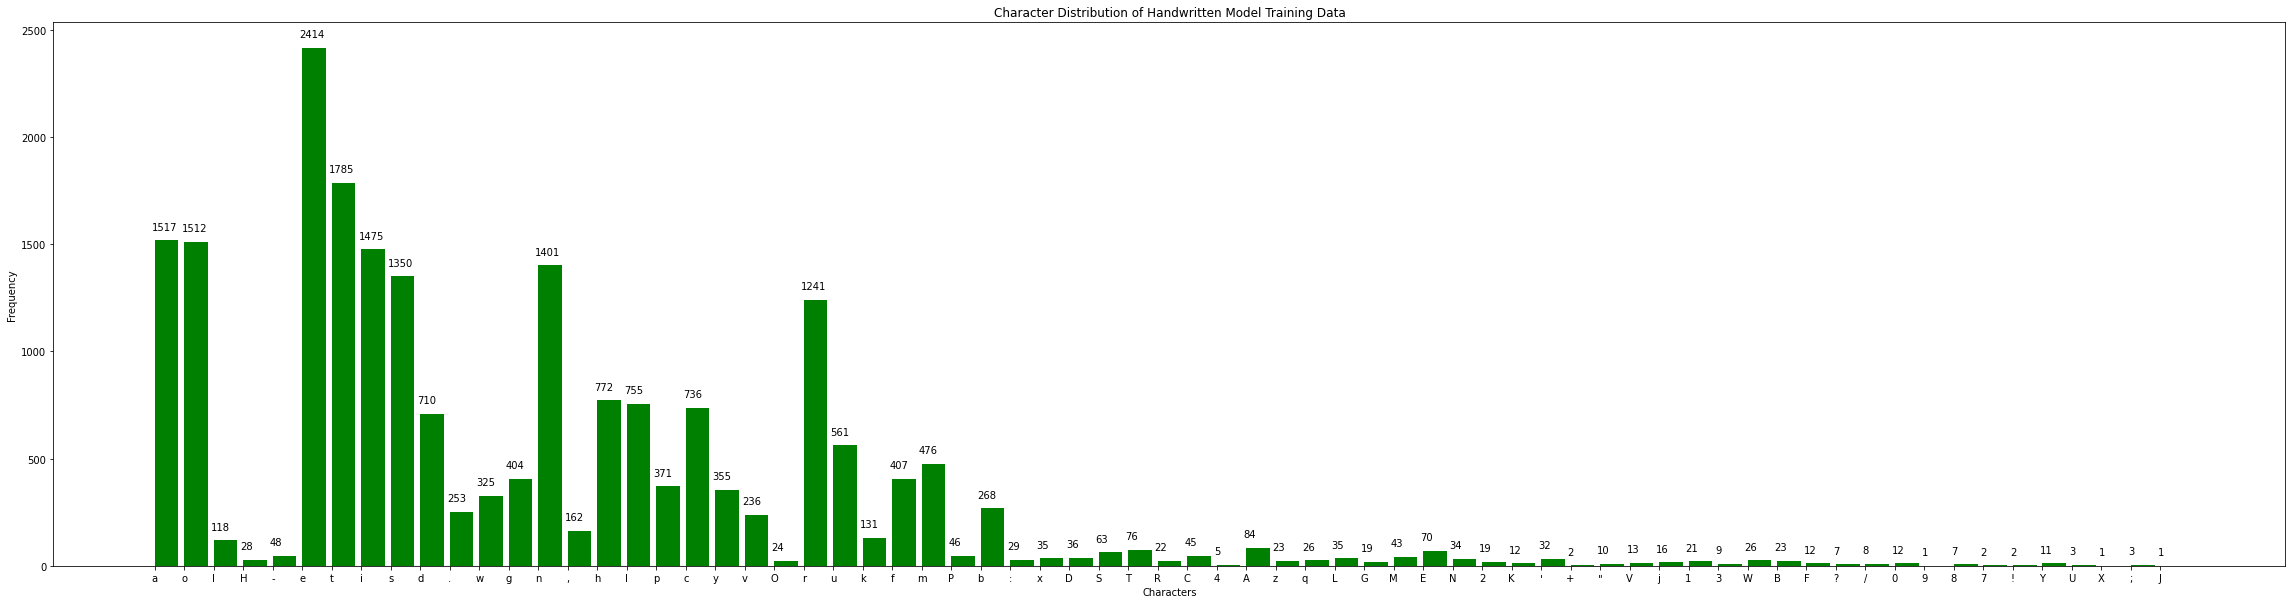

In [6]:
import numpy as np

x_labels = [char_index_map[int(index)] for index in count_dict.keys()]
y_points = list(count_dict.values())

print(len(x_labels), len(y_points))

pyplot.figure(figsize=(40, 10))
pyplot.bar(x_labels, y_points, width=0.8, align='edge', color='g')

i=1.0
j=50
for i in range(len(x_labels)):
    pyplot.annotate(y_points[i], (-0.1 + i, y_points[i] + j))

pyplot.title("Character Distribution of Handwritten Model Training Data")
pyplot.xlabel("Characters")
pyplot.ylabel("Frequency")

pyplot.savefig('handwritten.png', facecolor='white')

pyplot.show()